In [74]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re

In [75]:
# import data - nba injury data from 2010-2011 season through 2017-2018 season
data = pd.read_csv('injuries.csv')
data.columns = ['Date', 'Team', 'Acquired','Relinquished','Notes']
data.head()

Date     Team Acquired                   Relinquished  \
0  2010-10-03    Bulls      NaN                  Carlos Boozer   
1  2010-10-06  Pistons      NaN                  Jonas Jerebko   
2  2010-10-06  Pistons      NaN                  Terrico White   
3  2010-10-08  Blazers      NaN  Jeff Pendergraph / Jeff Ayres   
4  2010-10-08     Nets      NaN                    Troy Murphy   

                                               Notes  
0  fractured bone in right pinky finger (out inde...  
1     torn right Acchilles tendon (out indefinitely)  
2  broken fifth metatarsal in right foot (out ind...  
3          torn ACL in right knee (out indefinitely)  
4             strained lower back (out indefinitely)

In [76]:
# function definitions

def injType(x):
    
    bruise = ['bruise','bruised','bruising','contusion']
    ankle = ['ankle']
    head = ['concussion','headache','skull','head']
    shoulder = ['shoulder']
    knee = ['knee','patella','acl','ACL','meniscus']
    core = ['abdominal', 'core', 'ribs', 'rib', 'abdomen','oblique']
    wrist = ['wrist']
    hand_or_finger = ['hand', 'finger', 'thumb']
    illness = ['illness', 'sickness', 'flu', 'virus','cold', 'gastroenteritis', 'food poisoning','stomach','strep',
              'infection','pneumonia','bronchitis','chicken pox','ill']
    foot = ['foot', 'toe','feet', 'heel']
    arm = ['arm','elbow','bicep','tricep']
    back = ['spine', 'spinal', 'back']
    neck = ['neck']
    face = ['nose','eye','orbital','jaw','face','facial','cornea','cheek','mouth','oral','dental']
    leg = ['shin','fibula','leg','tibia','thigh','gluteus']
    hamstring = ['hamstring']
    calf = ['calf']
    quad = ['quad']
    groin = ['groin','adductor','abductor']
    hip = ['hip']
    rest = ['rest','conditioning']
    achilles = ['achilles','Achilles','acchilles','Acchilles']
    cardio = ['heart', 'lungs', 'lung', 'blood','pulmonary']
    shoulder = ['shoulder', 'rotator cuff']
    
    if any(c in x for c in bruise):
        return 'bruise'
    
    elif any(c in x for c in ankle):
        return 'ankle'
    
    elif any(c in x for c in head):
        return 'head'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    elif any(c in x for c in knee):
        return 'knee'
    
    elif any(c in x for c in core):
        return 'core'
    
    elif any(c in x for c in wrist):
        return 'wrist'
    
    elif any(c in x for c in hand_or_finger):
        return 'hand/finger'
    
    elif any(c in x for c in illness):
        return 'illness'
    
    elif any(c in x for c in foot):
        return 'foot'
    
    elif any(c in x for c in arm):
        return 'arm'
    
    elif any(c in x for c in back):
        return 'back'
    
    elif any(c in x for c in neck):
        return 'neck'
    
    elif any(c in x for c in face):
        return 'face'
    
    elif any(c in x for c in leg):
        return 'leg'
    
    elif any(c in x for c in hamstring):
        return 'hamstring'
    
    elif any(c in x for c in calf):
        return 'calf'
    
    elif any(c in x for c in quad):
        return 'quad'
    
    elif any(c in x for c in hip):
        return 'hip'
    
    elif any(c in x for c in rest):
        return 'rest'
    
    elif any(c in x for c in groin):
        return 'groin'
    
    elif any(c in x for c in achilles):
        return 'achilles'
    
    elif any(c in x for c in cardio):
        return 'cardio'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    else:
        return 'Misc.'

In [77]:
# create a dataframe of only the rows in which a player becomes injured
injury_data = data[data['Relinquished'].apply(lambda x: pd.notnull(x))]

In [78]:
# categorize injury by injury type 
injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
injury_data.head()

Date     Team Acquired                   Relinquished  \
0  2010-10-03    Bulls      NaN                  Carlos Boozer   
1  2010-10-06  Pistons      NaN                  Jonas Jerebko   
2  2010-10-06  Pistons      NaN                  Terrico White   
3  2010-10-08  Blazers      NaN  Jeff Pendergraph / Jeff Ayres   
4  2010-10-08     Nets      NaN                    Troy Murphy   

                                               Notes  Injury Type  
0  fractured bone in right pinky finger (out inde...  hand/finger  
1     torn right Acchilles tendon (out indefinitely)      illness  
2  broken fifth metatarsal in right foot (out ind...         foot  
3          torn ACL in right knee (out indefinitely)         knee  
4             strained lower back (out indefinitely)         back

In [80]:
# create a column for 'out indefinitely' or 'out for season'
...

In [81]:
# # output to a csv file 
# injury_data.to_csv('injury_data.csv')

In [82]:
# count of injury by injury type
injury_types = injury_data.groupby('Injury Type').count()[['Notes']]
injury_types['Notes'].sort_values(ascending=False)

Injury Type
knee           1445
ankle          1255
illness         690
foot            579
back            530
bruise          498
rest            425
hamstring       371
hand/finger     315
shoulder        299
groin           266
calf            225
Misc.           218
hip             195
head            188
wrist           138
arm             135
leg             111
face            109
core            101
neck             49
quad             41
cardio           11
Name: Notes, dtype: int64

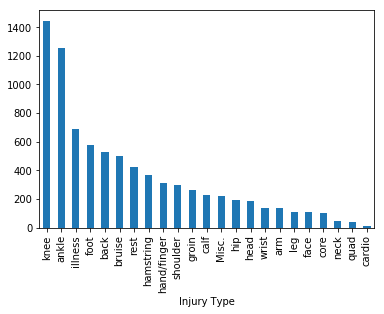

In [83]:
ax = injury_types['Notes'].sort_values(ascending=False).plot.bar()

In [84]:
# what are the misc. injuries?
misc_injuries = injury_data[injury_data['Injury Type']=='Misc.']
misc_injuries.head()

Date     Team Acquired           Relinquished            Notes  \
44   2010-11-08    Magic      NaN        Mickael Pietrus              DNP   
71   2010-11-17     Jazz      NaN         Kyrylo Fesenko  dizziness (DNP)   
84   2010-11-22  Hornets      NaN   Marcus Thornton (T.)              DNP   
394  2011-02-03    Bucks      NaN  Chris Douglas-Roberts              DNP   
479  2011-02-25  Blazers      NaN         Gerald Wallace              DNP   

    Injury Type  
44        Misc.  
71        Misc.  
84        Misc.  
394       Misc.  
479       Misc.

In [85]:
# divide the injury data into separate data frames for each season

# 2010-2011
injury_data_10 = injury_data[(injury_data['Date'] < '2011-08-01') & (injury_data['Date'] > '2010-10-01')]

# 2011-2012
injury_data_11 = injury_data[(injury_data['Date'] < '2012-08-01') & (injury_data['Date'] > '2011-10-01')]

# 2012-2013
injury_data_12 = injury_data[(injury_data['Date'] < '2013-08-01') & (injury_data['Date'] > '2012-10-01')]

# 2013-2014
injury_data_13 = injury_data[(injury_data['Date'] < '2014-08-01') & (injury_data['Date'] > '2013-10-01')]

# 2014-2015
injury_data_14 = injury_data[(injury_data['Date'] < '2015-08-01') & (injury_data['Date'] > '2014-10-01')]

# 2015-2016
injury_data_15 = injury_data[(injury_data['Date'] < '2016-08-01') & (injury_data['Date'] > '2015-10-01')]

# 2016-2017
injury_data_16 = injury_data[(injury_data['Date'] < '2017-08-01') & (injury_data['Date'] > '2016-10-01')]

# 2017-2018
injury_data_17 = injury_data[(injury_data['Date'] < '2018-08-01') & (injury_data['Date'] > '2017-10-01')]

Total number of injuries:  824


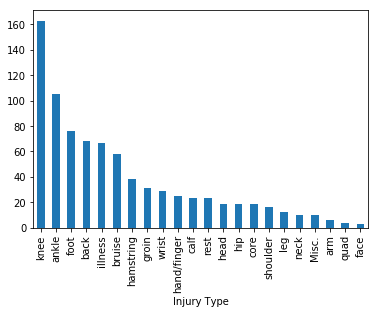

In [86]:
# injury types for 2010-2011 season - lockout year
injury_types_10 = injury_data_10.groupby('Injury Type').count()[['Notes']]
injury_types_10['Notes'].sort_values(ascending=False)

ax = injury_types_10['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_10))

Total number of injuries:  1352


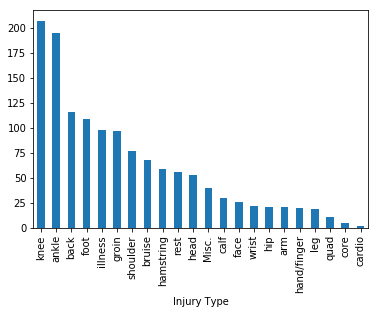

In [87]:
# injury types for 2011-2012 season
injury_types_11 = injury_data_11.groupby('Injury Type').count()[['Notes']]
injury_types_11['Notes'].sort_values(ascending=False)

ax = injury_types_11['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_11))

Total number of injuries:  1217


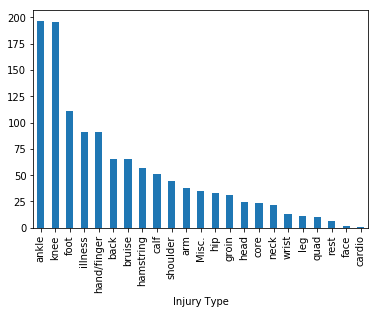

In [88]:
# injury types for 2012-2013 season
injury_types_12 = injury_data_12.groupby('Injury Type').count()[['Notes']]
injury_types_12['Notes'].sort_values(ascending=False)

ax = injury_types_12['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_12))

Total number of injuries:  1780


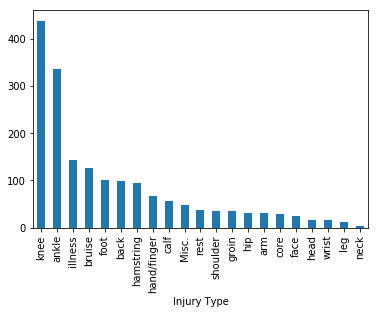

In [89]:
# injury types for 2013-2014 season
injury_types_13 = injury_data_13.groupby('Injury Type').count()[['Notes']]
injury_types_13['Notes'].sort_values(ascending=False)

ax = injury_types_13['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_13))

Total number of injuries:  666


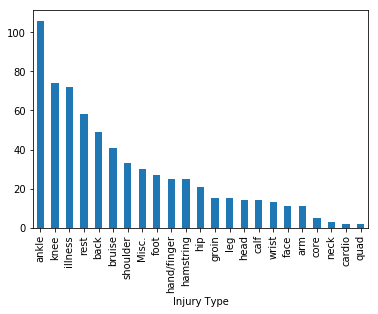

In [90]:
# injury types for 2014-2015 season
injury_types_14 = injury_data_14.groupby('Injury Type').count()[['Notes']]
injury_types_14['Notes'].sort_values(ascending=False)

ax = injury_types_14['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_14))

In [91]:
injury_types_14

Notes
Injury Type       
Misc.           30
ankle          106
arm             11
back            49
bruise          41
calf            14
cardio           2
core             5
face            11
foot            27
groin           15
hamstring       25
hand/finger     25
head            14
hip             21
illness         72
knee            74
leg             15
neck             3
quad             2
rest            58
shoulder        33
wrist           13

Total number of injuries:  809


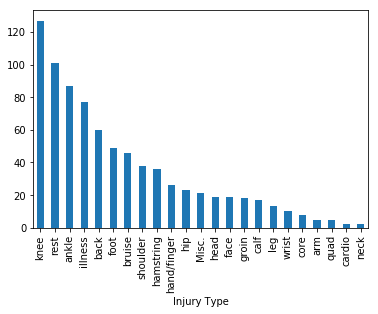

In [92]:
# injury types for 2015-2016 season
injury_types_15 = injury_data_15.groupby('Injury Type').count()[['Notes']]
injury_types_15['Notes'].sort_values(ascending=False)

ax = injury_types_15['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_15))

Total number of injuries:  842


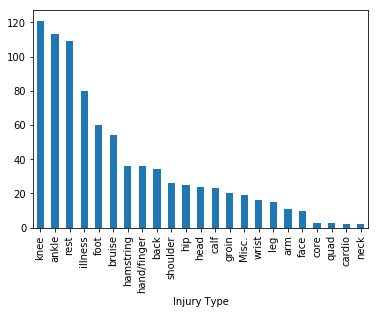

In [93]:
# injury types for 2016-2017 season
injury_types_16 = injury_data_16.groupby('Injury Type').count()[['Notes']]
injury_types_16['Notes'].sort_values(ascending=False)

ax = injury_types_16['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_16))

Total number of injuries:  644


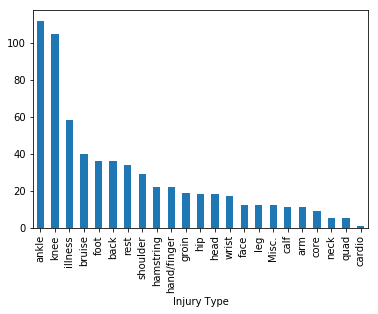

In [94]:
# injury types for the 2017-2018 season
injury_types_17 = injury_data_17.groupby('Injury Type').count()[['Notes']]
injury_types_17['Notes'].sort_values(ascending=False)

ax = injury_types_17['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_17))

In [95]:
# nba player per game statistics for each season
list_of_files = [f for f in listdir('nba_player_stats') if isfile(join('nba_player_stats', f))]
list_of_files

['2013-2014_nba_player_stats.txt',
 '2018-2019_nba_player_stats.txt',
 '2015-2016_nba_player_stats.txt',
 '2014-2015_nba_player_stats.txt',
 '2017-2018_nba_player_stats.txt',
 '2012-2013_nba_player_stats.txt',
 '2011-2012_nba_player_stats.txt',
 '2010-2011_nba_player_stats.txt',
 '2016-2017_nba_player_stats.txt']

In [96]:
# what types of players get what types of injuries

In [97]:
# does position / play style correlate with injury frequency? 

In [129]:
# read in the statistics from 17-18 NBA season
stats = pd.read_csv('nba_player_stats/' + list_of_files[4])
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
stats.head()  # normalize data

Rk                   Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  \
0   1   Álex Abrines\abrinal01  SG   24  OKC  75   8  15.1  1.5  3.9  0.395   
1   2       Quincy Acy\acyqu01  PF   27  BRK  70   8  19.4  1.9  5.2  0.356   
2   3   Steven Adams\adamsst01   C   24  OKC  76  76  32.7  5.9  9.4  0.629   
3   4    Bam Adebayo\adebaba01   C   20  MIA  69  19  19.8  2.5  4.9  0.512   
4   5  Arron Afflalo\afflaar01  SG   32  ORL  53   3  12.9  1.2  3.1  0.401   

    3P  3PA    3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  \
0  1.1  2.9  0.380  0.4  0.9  0.443  0.540  0.5  0.6  0.848  0.3  1.2  1.5   
1  1.5  4.2  0.349  0.4  1.0  0.384  0.496  0.7  0.9  0.817  0.6  3.1  3.7   
2  0.0  0.0  0.000  5.9  9.3  0.631  0.629  2.1  3.8  0.559  5.1  4.0  9.0   
3  0.0  0.1  0.000  2.5  4.8  0.523  0.512  1.9  2.6  0.721  1.7  3.8  5.5   
4  0.5  1.3  0.386  0.7  1.7  0.413  0.485  0.4  0.5  0.846  0.1  1.2  1.2   

   AST  STL  BLK  TOV   PF   PTS  
0  0.4  0.5  0.1  0.3  1.7   4.7  
1  0.8  0.5  0.4  0.9  2.1   5.9  
2  1.2  1.2  1.0  1.7  2.8  13.9  
3  1.5  0.5  0.6  1.0  2.0   6.9  
4  0.6  0.1  0.2  0.4  1.1   3.4

In [130]:
ex = stats['Player'][0]
regname = r".*?(?=\\)"  # use regular expression to extract player name 
names = re.findall(regname, ex)
names[0]

'Álex Abrines'

In [100]:
# use regex to normalize player names 
stats['Player'] = stats['Player'].apply(lambda x: (re.findall(regname,x))[0] ) 
stats.head()

Rk        Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  3PA  \
0   1  Álex Abrines  SG   25  OKC  31   2  19.0  1.8   5.1  0.357  1.3  4.1   
1   2    Quincy Acy  PF   28  PHO  10   0  12.3  0.4   1.8  0.222  0.2  1.5   
2   3  Jaylen Adams  PG   22  ATL  34   1  12.6  1.1   3.2  0.345  0.7  2.2   
3   4  Steven Adams   C   25  OKC  80  80  33.4  6.0  10.1  0.595  0.0  0.0   
4   5   Bam Adebayo   C   21  MIA  82  28  23.3  3.4   5.9  0.576  0.0  0.2   

     3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  \
0  0.323  0.5   1.0  0.500  0.487  0.4  0.4  0.923  0.2  1.4  1.5  0.6  0.5   
1  0.133  0.2   0.3  0.667  0.278  0.7  1.0  0.700  0.3  2.2  2.5  0.8  0.1   
2  0.338  0.4   1.1  0.361  0.459  0.2  0.3  0.778  0.3  1.4  1.8  1.9  0.4   
3  0.000  6.0  10.1  0.596  0.595  1.8  3.7  0.500  4.9  4.6  9.5  1.6  1.5   
4  0.200  3.4   5.7  0.588  0.579  2.0  2.8  0.735  2.0  5.3  7.3  2.2  0.9   

   BLK  TOV   PF   PTS  
0  0.2  0.5  1.7   5.3  
1  0.4  0.4  2.4   1.7  
2  0.1  0.8  1.3   3.2  
3  1.0  1.7  2.6  13.9  
4  0.8  1.5  2.5   8.9

In [101]:
stats = stats.drop(columns=["Rk","FG%","3P%","2P%","eFG%","FT%"])  # drop columns with percentages, unneeded
stats.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA   3P  3PA   2P   2PA  \
0  Álex Abrines  SG   25  OKC  31   2  19.0  1.8   5.1  1.3  4.1  0.5   1.0   
1    Quincy Acy  PF   28  PHO  10   0  12.3  0.4   1.8  0.2  1.5  0.2   0.3   
2  Jaylen Adams  PG   22  ATL  34   1  12.6  1.1   3.2  0.7  2.2  0.4   1.1   
3  Steven Adams   C   25  OKC  80  80  33.4  6.0  10.1  0.0  0.0  6.0  10.1   
4   Bam Adebayo   C   21  MIA  82  28  23.3  3.4   5.9  0.0  0.2  3.4   5.7   

    FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.4  0.4  0.2  1.4  1.5  0.6  0.5  0.2  0.5  1.7   5.3  
1  0.7  1.0  0.3  2.2  2.5  0.8  0.1  0.4  0.4  2.4   1.7  
2  0.2  0.3  0.3  1.4  1.8  1.9  0.4  0.1  0.8  1.3   3.2  
3  1.8  3.7  4.9  4.6  9.5  1.6  1.5  1.0  1.7  2.6  13.9  
4  2.0  2.8  2.0  5.3  7.3  2.2  0.9  0.8  1.5  2.5   8.9

In [102]:
#stats["Player"].apply(lambda x: print(x)) #check for duplicates

In [103]:
# player search
query_str = 'Player == "Rajon Rondo"'
playerx = stats.query(query_str)
playerx = playerx.iloc[0,:]
playerx

Player    Rajon Rondo
Pos                PG
Age                32
Tm                LAL
G                  46
GS                 29
MP               29.8
FG                3.8
FGA               9.4
3P                1.1
3PA               3.1
2P                2.7
2PA               6.3
FT                0.5
FTA               0.8
ORB               0.7
DRB               4.5
TRB               5.3
AST                 8
STL               1.2
BLK               0.2
TOV               2.8
PF                2.2
PTS               9.2
Name: 568, dtype: object

In [104]:
stats = stats.groupby("Player").apply(lambda x: x.iloc[0]).reset_index(drop=True) # remove duplicate rows, averaged into TOT 
stats.groupby("Player").size().max() # check for duplicate names

1

In [105]:
stats

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
0                Aaron Gordon     PF   23  ORL  78  78  33.8   6.0  13.4  1.6   
1               Aaron Holiday     PG   22  IND  50   0  12.9   2.1   5.2  0.9   
2                 Abdel Nader     SF   25  OKC  61   1  11.4   1.5   3.5  0.5   
3                  Al Horford      C   32  BOS  68  68  29.0   5.7  10.6  1.1   
4             Al-Farouq Aminu     PF   28  POR  81  81  28.3   3.2   7.3  1.2   
5               Alan Williams     PF   26  BRK   5   0   5.2   1.6   2.6  0.0   
6                  Alec Burks     SG   27  TOT  64  24  21.5   3.0   7.4  1.0   
7                 Alex Caruso     PG   24  LAL  25   4  21.2   3.1   6.9  1.0   
8                    Alex Len      C   25  ATL  77  31  20.1   4.2   8.4  1.0   
9              Alex Poythress     PF   25  ATL  21   1  14.5   1.9   3.9  0.4   
10           Alfonzo McKinnie     SF   26  GSW  72   5  13.9   1.9   3.8  0.6   
11              Alize Johnson     PF   22  IND  14   0   4.6   0.3   1.1  0.1   
12               Allen Crabbe     SG   26  BRK  43  20  26.3   3.2   8.7  2.3   
13              Allonzo Trier     SG   23  NYK  64   3  22.8   3.6   8.1  0.8   
14            Amile Jefferson     PF   25  ORL  12   0   5.7   0.8   1.3  0.0   
15               Amir Johnson      C   31  PHI  51   6  10.4   1.5   3.1  0.2   
16             Andre Drummond      C   25  DET  79  79  33.5   7.1  13.3  0.1   
17             Andre Iguodala     SF   35  GSW  68  13  23.2   2.2   4.4  0.7   
18               Andre Ingram     SG   33  LAL   4   0   3.8   0.0   1.5  0.0   
19               Andrew Bogut      C   34  GSW  11   5  12.2   1.6   3.3  0.0   
20            Andrew Harrison     PG   24  TOT  17   0  11.0   0.9   3.1  0.3   
21             Andrew Wiggins     SF   23  MIN  73  73  34.8   6.8  16.6  1.6   
22            Anfernee Simons     SG   19  POR  20   1   7.1   1.4   3.2  0.5   
23                 Ante Žižić      C   22  CLE  59  25  18.3   3.1   5.6  0.0   
24              Anthony Davis      C   25  NOP  56  56  33.0   9.5  18.3  0.9   
25           Anthony Tolliver     PF   33  MIN  65   0  16.6   1.5   4.0  1.2   
26           Antonio Blakeney     SG   22  CHI  57   3  14.5   2.9   6.9  0.6   
27                Aron Baynes      C   32  BOS  51  18  16.1   2.1   4.4  0.4   
28              Austin Rivers     SG   26  TOT  76  15  26.7   3.1   7.5  1.4   
29              Avery Bradley     SG   28  TOT  63  63  30.2   3.9   9.7  1.4   
30               B.J. Johnson     SF   23  TOT   7   0   7.0   1.3   2.6  0.4   
31                Bam Adebayo      C   21  MIA  82  28  23.3   3.4   5.9  0.0   
32               Ben McLemore     SG   25  SAC  19   0   8.3   1.3   3.4  0.9   
33                Ben Simmons     PG   22  PHI  79  79  34.2   6.8  12.2  0.0   
34              Billy Garrett     SG   24  NYK   4   0  15.8   2.8   6.8  0.0   
35            Bismack Biyombo      C   26  CHO  54  32  14.5   1.6   2.9  0.0   
36              Blake Griffin     PF   29  DET  75  75  35.0   8.3  17.9  2.5   
37           Boban Marjanović      C   30  TOT  58  12  11.7   2.8   4.5  0.1   
38               Bobby Portis     PF   23  TOT  50  28  26.0   5.6  12.6  1.5   
39          Bogdan Bogdanović     SG   26  SAC  70  17  27.8   5.2  12.3  1.9   
40           Bojan Bogdanović     SF   29  IND  81  81  31.8   6.4  13.0  2.0   
41              Bonzie Colson     SF   23  MIL   8   2  12.3   1.6   4.9  0.6   
42             Brad Wanamaker     PG   29  BOS  36   0   9.5   1.4   2.9  0.4   
43               Bradley Beal     SG   25  WAS  82  82  36.9   9.3  19.6  2.5   
44            Brandon Goodwin     PG   23  DEN  16   0   3.6   0.4   1.4  0.1   
45             Brandon Ingram     SF   21  LAL  52  52  33.8   7.0  14.0  0.6   
46             Brandon Knight     PG   27  TOT  39  26  18.9   2.5   6.7  1.1   
47            Brandon Sampson     SG   21  CHI  14   2  15.3   2.0   4.3  0.8   
48                Brook Lopez      C   30  MIL  81  81

In [106]:
# sort stats data frame by points, high to low
stats = stats.sort_values(by="PTS", ascending = False).reset_index(drop = True)

In [107]:
stats = stats[(stats.MP > 4)] #remove players who play less than 4 minutes per game
stats

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
0                James Harden     PG   29  HOU  78  78  36.8  10.8  24.5  4.8   
1                 Paul George     SF   28  OKC  77  77  36.9   9.2  21.0  3.8   
2       Giannis Antetokounmpo     PF   24  MIL  72  72  32.8  10.0  17.3  0.7   
3                 Joel Embiid      C   24  PHI  64  64  33.7   9.1  18.7  1.2   
4                LeBron James     SF   34  LAL  55  55  35.2  10.1  19.9  2.0   
5               Stephen Curry     PG   30  GSW  69  69  33.8   9.2  19.4  5.1   
6                Devin Booker     SG   22  PHO  64  64  35.0   9.2  19.6  2.1   
7               Kawhi Leonard     SF   27  TOR  60  60  34.0   9.3  18.8  1.9   
8                Kevin Durant     SF   30  GSW  78  78  34.6   9.2  17.7  1.8   
9               Anthony Davis      C   25  NOP  56  56  33.0   9.5  18.3  0.9   
10             Damian Lillard     PG   28  POR  80  80  35.5   8.5  19.2  3.0   
11               Bradley Beal     SG   25  WAS  82  82  36.9   9.3  19.6  2.5   
12               Kemba Walker     PG   28  CHO  82  82  34.9   8.9  20.5  3.2   
13              Blake Griffin     PF   29  DET  75  75  35.0   8.3  17.9  2.5   
14         Karl-Anthony Towns      C   23  MIN  77  77  33.1   8.8  17.1  1.8   
15               Kyrie Irving     PG   26  BOS  67  67  33.0   9.0  18.5  2.6   
16           Donovan Mitchell     SG   22  UTA  77  77  33.7   8.6  19.9  2.4   
17                Zach LaVine     SG   23  CHI  63  62  34.5   8.4  18.0  1.9   
18          Russell Westbrook     PG   30  OKC  73  73  36.0   8.6  20.2  1.6   
19              Klay Thompson     SG   28  GSW  78  78  34.0   8.4  18.0  3.1   
20              Julius Randle     PF   24  NOP  73  49  30.6   7.8  14.9  0.9   
21          LaMarcus Aldridge      C   33  SAS  81  81  33.2   8.4  16.3  0.1   
22                Luka Dončić     SG   19  DAL  72  72  32.2   7.0  16.5  2.3   
23              DeMar DeRozan     SG   29  SAS  77  77  34.9   8.2  17.1  0.1   
24               Jrue Holiday     SG   28  NOP  67  67  35.9   8.2  17.3  1.8   
25                Mike Conley     PG   31  MEM  70  70  33.5   7.0  16.0  2.2   
26           D'Angelo Russell     PG   22  BRK  81  81  30.2   8.1  18.7  2.9   
27                CJ McCollum     SG   27  POR  70  70  33.9   8.2  17.8  2.4   
28             Nikola Vučević      C   28  ORL  80  80  31.4   8.8  16.9  1.1   
29                  John Wall     PG   28  WAS  32  32  34.5   7.7  17.3  1.6   
30                Buddy Hield     SG   26  SAC  82  82  31.9   7.6  16.6  3.4   
31               Nikola Jokić      C   23  DEN  80  80  31.3   7.7  15.1  1.0   
32              Tobias Harris     PF   26  TOT  82  82  34.7   7.5  15.3  1.9   
33               Lou Williams     SG   32  LAC  75   1  26.6   6.5  15.2  1.4   
34             JaKarr Sampson     SF   25  CHI   4   0  31.8   7.3  13.5  1.3   
35           Danilo Gallinari     SF   30  LAC  68  68  30.3   6.0  13.0  2.4   
36               John Collins     PF   21  ATL  61  59  30.0   7.6  13.6  0.9   
37                 Trae Young     PG   20  ATL  81  81  30.9   6.5  15.5  1.9   
38             Victor Oladipo     SG   26  IND  36  36  31.9   6.9  16.3  2.1   
39               Jimmy Butler  SF-SG   29  TOT  65  65  33.6   6.4  13.9  1.0   
40            Lauri Markkanen     PF   21  CHI  52  51  32.3   6.6  15.3  2.3   
41                 Kyle Kuzma     PF   23  LAL  70  68  33.1   7.1  15.5  1.8   
42            Khris Middleton     SF   27  MIL  77  77  31.1   6.6  14.9  2.3   
43             Brandon Ingram     SF   21  LAL  52  52  33.8   7.0  14.0  0.6   
44               Jamal Murray     PG   21  DEN  75  74  32.6   6.8  15.6  2.0   
45               Tim Hardaway     SG   26  TOT  65  63  31.6   6.0  15.3  2.5   
46             Andrew Wiggins     SF   23  MIN  73  73  34.8   6.8  16.6  1.6   
47                J.J. Redick     SG   34  PHI  76  63  31.3   5.9  13.5  3.2   
48                T.J. Warren     SF   25  PHO  43  36

In [108]:
stats.sort_values(by="FGA", ascending = False) # sort by field goals attempted, should have high OAG

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
0                James Harden     PG   29  HOU  78  78  36.8  10.8  24.5  4.8   
1                 Paul George     SF   28  OKC  77  77  36.9   9.2  21.0  3.8   
12               Kemba Walker     PG   28  CHO  82  82  34.9   8.9  20.5  3.2   
18          Russell Westbrook     PG   30  OKC  73  73  36.0   8.6  20.2  1.6   
16           Donovan Mitchell     SG   22  UTA  77  77  33.7   8.6  19.9  2.4   
4                LeBron James     SF   34  LAL  55  55  35.2  10.1  19.9  2.0   
11               Bradley Beal     SG   25  WAS  82  82  36.9   9.3  19.6  2.5   
6                Devin Booker     SG   22  PHO  64  64  35.0   9.2  19.6  2.1   
5               Stephen Curry     PG   30  GSW  69  69  33.8   9.2  19.4  5.1   
10             Damian Lillard     PG   28  POR  80  80  35.5   8.5  19.2  3.0   
7               Kawhi Leonard     SF   27  TOR  60  60  34.0   9.3  18.8  1.9   
3                 Joel Embiid      C   24  PHI  64  64  33.7   9.1  18.7  1.2   
26           D'Angelo Russell     PG   22  BRK  81  81  30.2   8.1  18.7  2.9   
15               Kyrie Irving     PG   26  BOS  67  67  33.0   9.0  18.5  2.6   
9               Anthony Davis      C   25  NOP  56  56  33.0   9.5  18.3  0.9   
17                Zach LaVine     SG   23  CHI  63  62  34.5   8.4  18.0  1.9   
19              Klay Thompson     SG   28  GSW  78  78  34.0   8.4  18.0  3.1   
13              Blake Griffin     PF   29  DET  75  75  35.0   8.3  17.9  2.5   
27                CJ McCollum     SG   27  POR  70  70  33.9   8.2  17.8  2.4   
8                Kevin Durant     SF   30  GSW  78  78  34.6   9.2  17.7  1.8   
24               Jrue Holiday     SG   28  NOP  67  67  35.9   8.2  17.3  1.8   
2       Giannis Antetokounmpo     PF   24  MIL  72  72  32.8  10.0  17.3  0.7   
29                  John Wall     PG   28  WAS  32  32  34.5   7.7  17.3  1.6   
23              DeMar DeRozan     SG   29  SAS  77  77  34.9   8.2  17.1  0.1   
14         Karl-Anthony Towns      C   23  MIN  77  77  33.1   8.8  17.1  1.8   
28             Nikola Vučević      C   28  ORL  80  80  31.4   8.8  16.9  1.1   
46             Andrew Wiggins     SF   23  MIN  73  73  34.8   6.8  16.6  1.6   
30                Buddy Hield     SG   26  SAC  82  82  31.9   7.6  16.6  3.4   
22                Luka Dončić     SG   19  DAL  72  72  32.2   7.0  16.5  2.3   
38             Victor Oladipo     SG   26  IND  36  36  31.9   6.9  16.3  2.1   
21          LaMarcus Aldridge      C   33  SAS  81  81  33.2   8.4  16.3  0.1   
25                Mike Conley     PG   31  MEM  70  70  33.5   7.0  16.0  2.2   
44               Jamal Murray     PG   21  DEN  75  74  32.6   6.8  15.6  2.0   
37                 Trae Young     PG   20  ATL  81  81  30.9   6.5  15.5  1.9   
41                 Kyle Kuzma     PF   23  LAL  70  68  33.1   7.1  15.5  1.8   
32              Tobias Harris     PF   26  TOT  82  82  34.7   7.5  15.3  1.9   
45               Tim Hardaway     SG   26  TOT  65  63  31.6   6.0  15.3  2.5   
40            Lauri Markkanen     PF   21  CHI  52  51  32.3   6.6  15.3  2.3   
33               Lou Williams     SG   32  LAC  75   1  26.6   6.5  15.2  1.4   
31               Nikola Jokić      C   23  DEN  80  80  31.3   7.7  15.1  1.0   
42            Khris Middleton     SF   27  MIL  77  77  31.1   6.6  14.9  2.3   
20              Julius Randle     PF   24  NOP  73  49  30.6   7.8  14.9  0.9   
49               Derrick Rose     PG   30  MIN  51  13  27.3   7.1  14.8  1.1   
59              Collin Sexton     PG   20  CLE  82  72  31.8   6.3  14.7  1.5   
58            Jordan Clarkson     SG   26  CLE  81   0  27.3   6.5  14.6  1.8   
87                 Walt Lemon     PG   26  CHI   6   3  27.8   6.3  14.5  0.3   
48                T.J. Warren     SF   25  PHO  43  36  31.6   6.9  14.2  1.8   
61            Josh Richardson     SG   25  MIA  73  73  34.8   5.8  14.1  2.2   
75            Dennis Schröder     PG   25  OKC  79  14

In [109]:
#agression metric
#defensive : MP, DRB, STL, BLK, PF
#offensive : MP, FGA, FTA, ORB, AST

mp = .1
drb = 1.2
stl = 2
blk = 2 
pf = 1

ad = stats.sort_values(by="BLK", ascending = False).iloc[0] # check DAG metric with Anthony Davis statistics, top defender
num = ad.MP*mp + ad.DRB*drb + ad.STL*stl + ad.BLK*blk + ad.PF*pf
print("Anthony Davis defensive agression: ", num)







Anthony Davis defensive agression:  19.42


In [110]:
fga = .7
fta = 1
orb = 1.2
ast = .4

russ = stats.sort_values(by="FGA", ascending = False).iloc[0]
num = russ.MP*mp + russ.FGA*fga + russ.FTA*fta + russ.AST*ast + russ.ORB*orb #check OAG metric with Russ Westbrook, top offender
print("Russel Westbrook offensive agression: ", num)


Russel Westbrook offensive agression:  35.79


In [111]:
stats["OAG"] = (stats.FGA*fga + stats.FTA*fta + stats.AST*ast + stats.ORB*orb)/stats.MP # add column for offensive agression metric
stats["DAG"] = (stats.DRB*drb + stats.STL*stl + stats.BLK*blk + stats.PF*pf)/stats.MP # add column for defensive agression metric 
stats = stats[(stats.MP >= 10)]


In [112]:
stats

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
0                James Harden     PG   29  HOU  78  78  36.8  10.8  24.5  4.8   
1                 Paul George     SF   28  OKC  77  77  36.9   9.2  21.0  3.8   
2       Giannis Antetokounmpo     PF   24  MIL  72  72  32.8  10.0  17.3  0.7   
3                 Joel Embiid      C   24  PHI  64  64  33.7   9.1  18.7  1.2   
4                LeBron James     SF   34  LAL  55  55  35.2  10.1  19.9  2.0   
5               Stephen Curry     PG   30  GSW  69  69  33.8   9.2  19.4  5.1   
6                Devin Booker     SG   22  PHO  64  64  35.0   9.2  19.6  2.1   
7               Kawhi Leonard     SF   27  TOR  60  60  34.0   9.3  18.8  1.9   
8                Kevin Durant     SF   30  GSW  78  78  34.6   9.2  17.7  1.8   
9               Anthony Davis      C   25  NOP  56  56  33.0   9.5  18.3  0.9   
10             Damian Lillard     PG   28  POR  80  80  35.5   8.5  19.2  3.0   
11               Bradley Beal     SG   25  WAS  82  82  36.9   9.3  19.6  2.5   
12               Kemba Walker     PG   28  CHO  82  82  34.9   8.9  20.5  3.2   
13              Blake Griffin     PF   29  DET  75  75  35.0   8.3  17.9  2.5   
14         Karl-Anthony Towns      C   23  MIN  77  77  33.1   8.8  17.1  1.8   
15               Kyrie Irving     PG   26  BOS  67  67  33.0   9.0  18.5  2.6   
16           Donovan Mitchell     SG   22  UTA  77  77  33.7   8.6  19.9  2.4   
17                Zach LaVine     SG   23  CHI  63  62  34.5   8.4  18.0  1.9   
18          Russell Westbrook     PG   30  OKC  73  73  36.0   8.6  20.2  1.6   
19              Klay Thompson     SG   28  GSW  78  78  34.0   8.4  18.0  3.1   
20              Julius Randle     PF   24  NOP  73  49  30.6   7.8  14.9  0.9   
21          LaMarcus Aldridge      C   33  SAS  81  81  33.2   8.4  16.3  0.1   
22                Luka Dončić     SG   19  DAL  72  72  32.2   7.0  16.5  2.3   
23              DeMar DeRozan     SG   29  SAS  77  77  34.9   8.2  17.1  0.1   
24               Jrue Holiday     SG   28  NOP  67  67  35.9   8.2  17.3  1.8   
25                Mike Conley     PG   31  MEM  70  70  33.5   7.0  16.0  2.2   
26           D'Angelo Russell     PG   22  BRK  81  81  30.2   8.1  18.7  2.9   
27                CJ McCollum     SG   27  POR  70  70  33.9   8.2  17.8  2.4   
28             Nikola Vučević      C   28  ORL  80  80  31.4   8.8  16.9  1.1   
29                  John Wall     PG   28  WAS  32  32  34.5   7.7  17.3  1.6   
30                Buddy Hield     SG   26  SAC  82  82  31.9   7.6  16.6  3.4   
31               Nikola Jokić      C   23  DEN  80  80  31.3   7.7  15.1  1.0   
32              Tobias Harris     PF   26  TOT  82  82  34.7   7.5  15.3  1.9   
33               Lou Williams     SG   32  LAC  75   1  26.6   6.5  15.2  1.4   
34             JaKarr Sampson     SF   25  CHI   4   0  31.8   7.3  13.5  1.3   
35           Danilo Gallinari     SF   30  LAC  68  68  30.3   6.0  13.0  2.4   
36               John Collins     PF   21  ATL  61  59  30.0   7.6  13.6  0.9   
37                 Trae Young     PG   20  ATL  81  81  30.9   6.5  15.5  1.9   
38             Victor Oladipo     SG   26  IND  36  36  31.9   6.9  16.3  2.1   
39               Jimmy Butler  SF-SG   29  TOT  65  65  33.6   6.4  13.9  1.0   
40            Lauri Markkanen     PF   21  CHI  52  51  32.3   6.6  15.3  2.3   
41                 Kyle Kuzma     PF   23  LAL  70  68  33.1   7.1  15.5  1.8   
42            Khris Middleton     SF   27  MIL  77  77  31.1   6.6  14.9  2.3   
43             Brandon Ingram     SF   21  LAL  52  52  33.8   7.0  14.0  0.6   
44               Jamal Murray     PG   21  DEN  75  74  32.6   6.8  15.6  2.0   
45               Tim Hardaway     SG   26  TOT  65  63  31.6   6.0  15.3  2.5   
46             Andrew Wiggins     SF   23  MIN  73  73  34.8   6.8  16.6  1.6   
47                J.J. Redick     SG   34  PHI  76  63  31.3   5.9  13.5  3.2   
48                T.J. Warren     SF   25  PHO  43  36

In [113]:
#sort by DAG, OAG
stats.sort_values(by="DAG", ascending = False)

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
121          Hassan Whiteside      C   29  MIA  72  53  23.3   5.4   9.4  0.0   
427              Andrew Bogut      C   34  GSW  11   5  12.2   1.6   3.3  0.0   
363              Nerlens Noel      C   24  OKC  77   2  13.7   2.1   3.6  0.0   
251         Mitchell Robinson      C   20  NYK  66  19  20.6   3.1   4.4  0.0   
65           DeMarcus Cousins      C   28  GSW  30  30  25.7   5.9  12.4  0.9   
51             Andre Drummond      C   25  DET  79  79  33.5   7.1  13.3  0.1   
406              Ray Spalding     PF   21  TOT  14   3  10.6   1.8   3.4  0.0   
3                 Joel Embiid      C   24  PHI  64  64  33.7   9.1  18.7  1.2   
2       Giannis Antetokounmpo     PF   24  MIL  72  72  32.8  10.0  17.3  0.7   
327                  Ed Davis      C   29  BRK  81   1  17.9   2.3   3.7  0.0   
9               Anthony Davis      C   25  NOP  56  56  33.0   9.5  18.3  0.9   
69                Rudy Gobert      C   26  UTA  81  80  31.8   5.9   8.8  0.0   
335               John Henson      C   28  MIL  14   0  13.4   2.2   4.8  0.8   
125              JaVale McGee      C   31  LAL  75  62  22.3   5.3   8.5  0.0   
314             Cheick Diallo     PF   22  NOP  64   1  14.0   2.6   4.2  0.0   
72          Jonas Valančiūnas      C   26  TOT  49  27  22.3   6.1  11.0  0.3   
73               Jusuf Nurkić      C   24  POR  72  72  27.4   5.8  11.5  0.0   
304                  Mo Bamba      C   20  ORL  47   1  16.3   2.5   5.2  0.4   
330              Tony Bradley      C   21  UTA   3   0  12.0   2.7   5.3  0.0   
260               Joakim Noah      C   33  MEM  42   1  16.5   2.6   5.1  0.0   
408               Salah Mejri      C   32  DAL  36   4  11.1   1.5   3.1  0.3   
399              Isaiah Hicks     PF   24  NYK   3   0  10.7   1.3   2.7  0.0   
14         Karl-Anthony Towns      C   23  MIN  77  77  33.1   8.8  17.1  1.8   
253          Boban Marjanović      C   30  TOT  58  12  11.7   2.8   4.5  0.1   
145            DeAndre Jordan      C   30  TOT  69  69  29.7   4.1   6.5  0.0   
153            Dewayne Dedmon      C   29  ATL  64  52  25.1   4.0   8.2  1.3   
222            Richaun Holmes      C   25  PHO  70   4  16.9   3.2   5.2  0.0   
407                 Pau Gasol      C   38  TOT  30   6  12.0   1.4   3.1  0.2   
108              Myles Turner      C   22  IND  74  74  28.6   5.1  10.5  1.0   
419              Kosta Koufos      C   29  SAC  42   1  12.0   1.7   3.6  0.0   
371              Jonah Bolden     PF   23  PHI  44  10  14.5   1.8   3.7  0.8   
294              Gorgui Dieng      C   29  MIN  76   2  13.6   2.5   5.0  0.3   
230             Mason Plumlee      C   28  DEN  82  17  21.1   3.2   5.4  0.0   
113             Dwight Howard      C   33  WAS   9   9  25.6   4.8   7.7  0.0   
28             Nikola Vučević      C   28  ORL  80  80  31.4   8.8  16.9  1.1   
18          Russell Westbrook     PG   30  OKC  73  73  36.0   8.6  20.2  1.6   
53                 Kevin Love     PF   30  CLE  22  21  27.2   5.0  12.9  2.4   
204               Ivica Zubac      C   21  TOT  59  37  17.6   3.6   6.4  0.0   
264               Harry Giles     PF   20  SAC  58   0  14.1   3.0   6.0  0.0   
90           Domantas Sabonis      C   22  IND  74   5  24.8   5.6   9.5  0.1   
31               Nikola Jokić      C   23  DEN  80  80  31.3   7.7  15.1  1.0   
393               Ian Mahinmi      C   32  WAS  34   6  14.6   1.4   3.1  0.1   
391           Marquese Chriss     PF   21  TOT  43   2  11.6   1.6   4.2  0.4   
411              Amir Johnson      C   31  PHI  51   6  10.4   1.5   3.1  0.2   
166            Wendell Carter      C   19  CHI  44  44  25.2   4.1   8.4  0.1   
200               Bam Adebayo      C   21  MIA  82  28  23.3   3.4   5.9  0.0   
380           Bismack Biyombo      C   26  CHO  54  32  14.5   1.6   2.9  0.0   
187            JaMychal Green     PF   28  TOT  65   6  21.1   3.5   7.3  1.1   
446            Tyson Chandler      C   36  TOT  55   6

In [114]:
stats.sort_values(by="OAG", ascending = False)

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
0                James Harden     PG   29  HOU  78  78  36.8  10.8  24.5  4.8   
3                 Joel Embiid      C   24  PHI  64  64  33.7   9.1  18.7  1.2   
2       Giannis Antetokounmpo     PF   24  MIL  72  72  32.8  10.0  17.3  0.7   
9               Anthony Davis      C   25  NOP  56  56  33.0   9.5  18.3  0.9   
33               Lou Williams     SG   32  LAC  75   1  26.6   6.5  15.2  1.4   
4                LeBron James     SF   34  LAL  55  55  35.2  10.1  19.9  2.0   
18          Russell Westbrook     PG   30  OKC  73  73  36.0   8.6  20.2  1.6   
14         Karl-Anthony Towns      C   23  MIN  77  77  33.1   8.8  17.1  1.8   
6                Devin Booker     SG   22  PHO  64  64  35.0   9.2  19.6  2.1   
20              Julius Randle     PF   24  NOP  73  49  30.6   7.8  14.9  0.9   
22                Luka Dončić     SG   19  DAL  72  72  32.2   7.0  16.5  2.3   
31               Nikola Jokić      C   23  DEN  80  80  31.3   7.7  15.1  1.0   
7               Kawhi Leonard     SF   27  TOR  60  60  34.0   9.3  18.8  1.9   
1                 Paul George     SF   28  OKC  77  77  36.9   9.2  21.0  3.8   
330              Tony Bradley      C   21  UTA   3   0  12.0   2.7   5.3  0.0   
73               Jusuf Nurkić      C   24  POR  72  72  27.4   5.8  11.5  0.0   
13              Blake Griffin     PF   29  DET  75  75  35.0   8.3  17.9  2.5   
10             Damian Lillard     PG   28  POR  80  80  35.5   8.5  19.2  3.0   
72          Jonas Valančiūnas      C   26  TOT  49  27  22.3   6.1  11.0  0.3   
12               Kemba Walker     PG   28  CHO  82  82  34.9   8.9  20.5  3.2   
37                 Trae Young     PG   20  ATL  81  81  30.9   6.5  15.5  1.9   
253          Boban Marjanović      C   30  TOT  58  12  11.7   2.8   4.5  0.1   
65           DeMarcus Cousins      C   28  GSW  30  30  25.7   5.9  12.4  0.9   
219            Christian Wood     PF   23  TOT  21   2  12.0   2.9   5.6  0.4   
51             Andre Drummond      C   25  DET  79  79  33.5   7.1  13.3  0.1   
16           Donovan Mitchell     SG   22  UTA  77  77  33.7   8.6  19.9  2.4   
21          LaMarcus Aldridge      C   33  SAS  81  81  33.2   8.4  16.3  0.1   
26           D'Angelo Russell     PG   22  BRK  81  81  30.2   8.1  18.7  2.9   
36               John Collins     PF   21  ATL  61  59  30.0   7.6  13.6  0.9   
252         Willy Hernangómez      C   24  CHO  58   3  14.0   2.6   5.1  0.3   
29                  John Wall     PG   28  WAS  32  32  34.5   7.7  17.3  1.6   
15               Kyrie Irving     PG   26  BOS  67  67  33.0   9.0  18.5  2.6   
8                Kevin Durant     SF   30  GSW  78  78  34.6   9.2  17.7  1.8   
121          Hassan Whiteside      C   29  MIA  72  53  23.3   5.4   9.4  0.0   
96                Enes Kanter      C   26  TOT  67  31  24.5   5.6  10.2  0.1   
53                 Kevin Love     PF   30  CLE  22  21  27.2   5.0  12.9  2.4   
28             Nikola Vučević      C   28  ORL  80  80  31.4   8.8  16.9  1.1   
84              Marvin Bagley     PF   19  SAC  62   4  25.3   5.7  11.4  0.5   
340               Greg Monroe      C   28  TOT  43   2  11.2   2.1   4.4  0.0   
262           Michael Beasley     PF   30  LAL  26   2  10.7   2.9   5.9  0.1   
225             Isaiah Thomas     SG   29  DEN  12   0  15.1   2.8   8.3  1.0   
11               Bradley Beal     SG   25  WAS  82  82  36.9   9.3  19.6  2.5   
5               Stephen Curry     PG   30  GSW  69  69  33.8   9.2  19.4  5.1   
17                Zach LaVine     SG   23  CHI  63  62  34.5   8.4  18.0  1.9   
62           Montrezl Harrell      C   25  LAC  82   5  26.3   6.7  10.8  0.0   
25                Mike Conley     PG   31  MEM  70  70  33.5   7.0  16.0  2.2   
23              DeMar DeRozan     SG   29  SAS  77  77  34.9   8.2  17.1  0.1   
149                J.J. Barea     PG   34  DAL  38   0  19.8   4.2  10.1  1.0   
90           Domantas Sabonis      C   22  IND  74   5

In [115]:
print("Average Defensive Agression: ", stats["DAG"].mean(axis=0))
print("Average Offensive Agression: ", stats["OAG"].mean(axis=0))


Average Defensive Agression:  0.3660317406299448
Average Offensive Agression:  0.4245091714727623


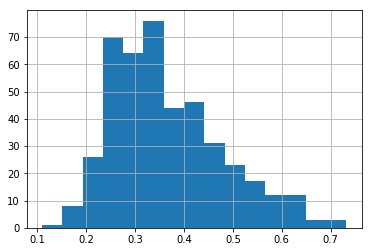

In [116]:
stats.DAG.hist(bins= 15) #check distribution 

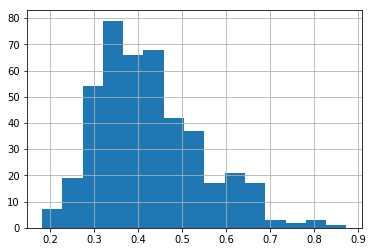

In [117]:
stats.OAG.hist(bins= 15)

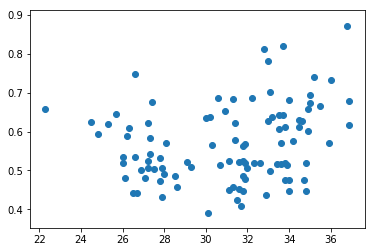

In [118]:
plt.scatter(stats.MP.head(100), stats.OAG.head(100))

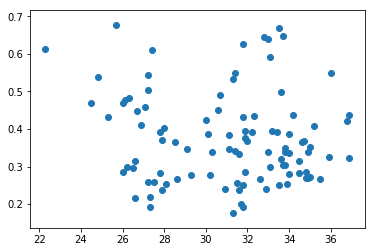

In [119]:
plt.scatter(stats.MP.head(100), stats.DAG.head(100))

In [120]:

injury_data_17

Date          Team Acquired  \
8850  2017-10-05       Blazers      NaN   
8851  2017-10-05       Hornets      NaN   
8852  2017-10-06         Kings      NaN   
8853  2017-10-07         Bulls      NaN   
8854  2017-10-07          Jazz      NaN   
8855  2017-10-07     Mavericks      NaN   
8856  2017-10-08         76ers      NaN   
8857  2017-10-09      Pelicans      NaN   
8858  2017-10-09       Wizards      NaN   
8859  2017-10-10       Wizards      NaN   
8860  2017-10-11         Hawks      NaN   
8861  2017-10-11       Hornets      NaN   
8862  2017-10-12          Heat      NaN   
8863  2017-10-12      Pelicans      NaN   
8864  2017-10-12          Suns      NaN   
8865  2017-10-14        Pacers      NaN   
8866  2017-10-16          Jazz      NaN   
8867  2017-10-17         Bulls      NaN   
8868  2017-10-17       Celtics      NaN   
8869  2017-10-17         Kings      NaN   
8870  2017-10-18         76ers      NaN   
8871  2017-10-18       Blazers      NaN   
8872  2017-10-18         Bucks      NaN   
8873  2017-10-18       Celtics      NaN   
8874  2017-10-18          Nets      NaN   
8875  2017-10-18        Pacers      NaN   
8876  2017-10-18       Rockets      NaN   
8877  2017-10-19     Grizzlies      NaN   
8878  2017-10-19        Pacers      NaN   
8880  2017-10-20     Cavaliers      NaN   
8881  2017-10-20          Heat      NaN   
8882  2017-10-20       Hornets      NaN   
8885  2017-10-21       Raptors      NaN   
8886  2017-10-22      Clippers      NaN   
8887  2017-10-23         Bucks      NaN   
8888  2017-10-23         Hawks      NaN   
8890  2017-10-24       Blazers      NaN   
8891  2017-10-24         Hawks      NaN   
8892  2017-10-24       Rockets      NaN   
8893  2017-10-24         Spurs      NaN   
8894  2017-10-24  Timberwolves      NaN   
8895  2017-10-25         76ers      NaN   
8896  2017-10-25       Blazers      NaN   
8897  2017-10-25     Cavaliers      NaN   
8898  2017-10-25     Grizzlies      NaN   
8899  2017-10-25       Raptors      NaN   
8901  2017-10-26         Bulls      NaN   
8902  2017-10-26     Mavericks      NaN   
8903  2017-10-26      Pelicans      NaN   
8905  2017-10-27       Hornets      NaN   
8906  2017-10-27         Spurs      NaN   
8907  2017-10-28         76ers      NaN   
8910  2017-10-28          Nets      NaN   
8912  2017-10-29     Cavaliers      NaN   
8913  2017-10-29       Hornets      NaN   
8917  2017-10-30       Raptors      NaN   
8919  2017-10-30         Spurs      NaN   
8920  2017-10-31          Jazz      NaN   
8921  2017-10-31          Nets      NaN   
8922  2017-11-01     Grizzlies      NaN   
8923  2017-11-01          Heat      NaN   
8924  2017-11-01       Pistons      NaN   
8926  2017-11-02     Cavaliers      NaN   
8927  2017-11-02        Lakers      NaN   
8928  2017-11-02         Magic      NaN   
8930  2017-11-03         Hawks      NaN   
8932  2017-11-03        Lakers      NaN   
8933  2017-11-03          Nets      NaN   
8934  2017-11-04         Bulls      NaN   
8936  2017-11-04         Hawks      NaN   
8937  2017-11-04        Pacers      NaN   
8938  2017-11-04     Grizzlies      NaN   
8939  2017-11-06         76ers      NaN   
8940  2017-11-06      Clippers      NaN   
8942  2017-11-07     Grizzlies      NaN   
8943  2017-11-07          Nets      NaN   
8944  2017-11-08          Suns      NaN   
8945  2017-11-09       Blazers      NaN   
8946  2017-11-09      Clippers      NaN   
8947  2017-11-09       Rockets      NaN   
8948  2017-11-10         76ers      NaN   
8949  2017-11-10       Hornets      NaN   
8950  2017-11-10          Nets      NaN   
8952  2017-11-11          Jazz      NaN   
8953  2017-11-11         Magic      NaN   
8954  2017-11-11      Pelicans      NaN   
8956  2017-11-11         Spurs      NaN   
8957  2017-11-11  Timberwolves      NaN   
8958  2017-11-11  Timberwolves      NaN   
8960  2017-11-12         Magic      NaN   
8961  2017-11-12          Nets      NaN   
8962  2017-11-12       Rockets      NaN   
8963  2017-11

In [121]:
#combine stats data and injurt data sets to make column for number of times injured during that season

injstats = pd.merge(stats, injury_data_17, how="inner", left_on="Player", right_on="Relinquished", indicator = True )
df = pd.DataFrame({"INJ":injstats.groupby("Player").size()})
superstats = pd.merge(stats,df, how= "left", left_on="Player", right_on="Player")
superstats = superstats.fillna(0)



In [124]:
superstats[superstats['OAG']==max(superstats['OAG'])]

Player Pos  Age   Tm   G  GS    MP    FG   FGA   3P   3PA   2P   2PA  \
0  James Harden  PG   29  HOU  78  78  36.8  10.8  24.5  4.8  13.2  6.0  11.3   

    FT   FTA  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS       OAG  \
0  9.7  11.0  0.8  5.8  6.6  7.5  2.0  0.7  5.0  3.1  36.1  0.872554   

        DAG  INJ  
0  0.420109  3.0

In [95]:
onlyinj = superstats[(superstats.INJ > 0)]
onlyinj
noinj = superstats[(superstats.INJ == 0)]
noinj

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
2               LeBron James     PF   33  CLE  82  82  36.9  10.5  19.3  1.8   
7          Russell Westbrook     PG   29  OKC  80  80  36.4   9.5  21.1  1.2   
11            Victor Oladipo     SG   25  IND  75  75  34.0   8.5  17.9  2.1   
15        Kristaps Porziņģis     PF   22  NYK  48  48  32.4   8.1  18.5  1.9   
16              Lou Williams     SG   31  LAC  79  19  32.8   7.4  16.9  2.4   
17              Bradley Beal     SG   24  WAS  82  82  36.3   8.3  18.1  2.4   
21               CJ McCollum     SG   26  POR  81  81  36.1   8.2  18.6  2.3   
23        Karl-Anthony Towns      C   22  MIN  82  82  35.6   7.8  14.3  1.5   
25           Khris Middleton     SF   26  MIL  82  82  36.4   7.2  15.5  1.8   
27             Klay Thompson     SG   27  GSW  73  73  34.3   7.9  16.2  3.1   
28               T.J. Warren     SF   24  PHO  65  65  33.0   8.1  16.4  0.3   
29           Dennis Schröder     PG   24  ATL  67  67  31.0   7.5  17.1  1.1   
31                 John Wall     PG   27  WAS  41  41  34.4   6.8  16.3  1.5   
33           Harrison Barnes     PF   25  DAL  77  77  34.2   7.0  15.7  1.5   
34             Tobias Harris     PF   25  TOT  80  80  33.4   7.0  15.3  2.3   
36              Nikola Jokić      C   22  DEN  75  73  32.6   6.7  13.5  1.5   
40            Andrew Wiggins     SF   22  MIN  82  82  36.3   6.9  15.9  1.4   
41              Eric Bledsoe     PG   28  TOT  74  74  31.4   6.3  13.4  1.7   
44              Tim Hardaway     SG   25  NYK  57  54  33.1   6.3  15.0  2.3   
46              Goran Dragić     PG   31  MIA  75  75  31.7   6.5  14.3  1.5   
49               Mike Conley     PG   30  MEM  12  12  31.1   5.3  14.0  2.0   
50               Zach LaVine     SG   22  CHI  24  24  27.3   5.7  14.8  1.8   
51              Jamal Murray     PG   20  DEN  81  80  31.7   5.9  13.1  2.0   
52             Dwight Howard      C   32  CHO  81  81  30.4   6.2  11.2  0.0   
53            Nikola Vučević      C   27  ORL  57  57  29.5   7.0  14.7  1.1   
55                Kyle Lowry     PG   31  TOR  78  78  32.2   5.2  12.1  3.1   
58             Julius Randle      C   23  LAL  82  49  26.7   6.1  11.0  0.1   
61               Will Barton     SG   27  DEN  81  40  33.1   5.7  12.7  1.9   
62            Nikola Mirotić     PF   26  TOT  55  14  27.2   5.6  12.4  2.5   
66              Dennis Smith     PG   20  DAL  69  69  29.7   5.9  14.8  1.5   
70               Otto Porter     SF   24  WAS  77  77  31.6   5.8  11.5  1.8   
72               Dario Šarić     PF   23  PHI  78  73  29.6   5.2  11.4  2.0   
73            Reggie Jackson     PG   27  DET  45  45  26.7   5.5  12.8  1.2   
78          Bojan Bogdanović     SF   28  IND  80  80  30.8   5.1  10.7  1.9   
79              Jusuf Nurkić      C   23  POR  79  79  26.4   6.1  12.0  0.0   
82     Taurean Waller-Prince     SF   23  ATL  82  82  30.0   5.1  11.9  2.1   
85              Jayson Tatum     SF   19  BOS  80  80  30.5   5.0  10.4  1.3   
87           Jordan Clarkson     SG   25  TOT  81   2  23.3   5.3  11.8  1.4   
90              Steven Adams      C   24  OKC  76  76  32.7   5.9   9.4  0.0   
94               Buddy Hield     SG   25  SAC  80  12  25.3   5.2  11.7  2.2   
99           Michael Beasley     PF   29  NYK  74  30  22.3   5.5  10.9  0.5   
108               Trey Burke     PG   25  NYK  36   9  21.8   5.4  10.7  1.1   
111        Jonas Valančiūnas      C   25  TOR  77  77  22.4   5.1   8.9  0.4   
112          Wesley Matthews     SF   31  DAL  63  62  33.8   4.5  11.1  2.4   
116         Robert Covington     SF   27  PHI  80  80  31.7   4.3  10.5  2.5   
117        Spencer Dinwiddie     PG   24  BRK  80  58  28.8   4.1  10.5  1.8   
118            E'Twaun Moore     SG   28  NOP  82  80  31.5   5.2  10.1  1.6   
121               Taj Gibson     PF   32  MIN  82  82  33.2   5.2   9.0  0.1   
122           Justin Holiday     SG   28  CHI  72  72  31.5   4.0  10.9  2.2   
125          Marco Bel

90
106


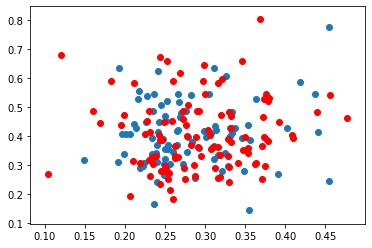

In [107]:
no_inj_g = noinj[(noinj.Pos == "SG") | (noinj.Pos == "PG")]
inj_g = onlyinj[(onlyinj.Pos == "SG") | (onlyinj.Pos == "PG")]


plt.scatter(no_inj_g.DAG,no_inj_g.OAG)
plt.scatter(inj_g.DAG,inj_g.OAG,c='r')

print(no_inj_g.Player.size)
print(inj_g.Player.size)

In [93]:
inj_g

Player Pos  Age   Tm   G  GS    MP   FG   FGA   3P  \
0                James Harden  SG   28  HOU  72  72  35.4  9.0  20.1  3.7   
1                James Harden  SG   28  HOU  72  72  35.4  9.0  20.1  3.7   
2                James Harden  SG   28  HOU  72  72  35.4  9.0  20.1  3.7   
8              Damian Lillard  PG   27  POR  73  73  36.6  8.5  19.4  3.1   
11              Stephen Curry  PG   29  GSW  51  51  32.0  8.4  16.9  4.2   
12              Stephen Curry  PG   29  GSW  51  51  32.0  8.4  16.9  4.2   
13              Stephen Curry  PG   29  GSW  51  51  32.0  8.4  16.9  4.2   
18               Devin Booker  SG   21  PHO  54  54  34.5  8.4  19.5  2.7   
19               Devin Booker  SG   21  PHO  54  54  34.5  8.4  19.5  2.7   
20               Devin Booker  SG   21  PHO  54  54  34.5  8.4  19.5  2.7   
21               Devin Booker  SG   21  PHO  54  54  34.5  8.4  19.5  2.7   
22               Devin Booker  SG   21  PHO  54  54  34.5  8.4  19.5  2.7   
23               Kyrie Irving  PG   25  BOS  60  60  32.2  8.9  18.1  2.8   
24               Kyrie Irving  PG   25  BOS  60  60  32.2  8.9  18.1  2.8   
25               Kyrie Irving  PG   25  BOS  60  60  32.2  8.9  18.1  2.8   
31              DeMar DeRozan  SG   28  TOR  80  80  33.9  8.1  17.7  1.1   
38               Jimmy Butler  SG   28  MIN  59  59  36.7  7.4  15.6  1.2   
39               Jimmy Butler  SG   28  MIN  59  59  36.7  7.4  15.6  1.2   
40               Jimmy Butler  SG   28  MIN  59  59  36.7  7.4  15.6  1.2   
41               Kemba Walker  PG   27  CHO  80  80  34.2  7.4  17.0  2.9   
45           Donovan Mitchell  SG   21  UTA  79  71  33.4  7.5  17.2  2.4   
46           Donovan Mitchell  SG   21  UTA  79  71  33.4  7.5  17.2  2.4   
47             MarShon Brooks  SG   29  MEM   7   1  27.6  7.3  14.6  2.7   
48               Tyreke Evans  PG   28  MEM  52  32  30.9  7.0  15.6  2.2   
49               Tyreke Evans  PG   28  MEM  52  32  30.9  7.0  15.6  2.2   
50               Tyreke Evans  PG   28  MEM  52  32  30.9  7.0  15.6  2.2   
51               Tyreke Evans  PG   28  MEM  52  32  30.9  7.0  15.6  2.2   
52               Jrue Holiday  SG   27  NOP  81  81  36.1  7.6  15.4  1.5   
53                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
54                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
55                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
56                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
57                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
58                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
59                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
60                 Chris Paul  PG   32  HOU  58  58  31.8  6.3  13.8  2.5   
61                Eric Gordon  SG   29  HOU  69  30  31.2  6.0  14.1  3.2   
62                Eric Gordon  SG   29  HOU  69  30  31.2  6.0  14.1  3.2   
63                Eric Gordon  SG   29  HOU  69  30  31.2  6.0  14.1  3.2   
64                Eric Gordon  SG   29  HOU  69  30  31.2  6.0  14.1  3.2   
65                Eric Gordon  SG   29  HOU  69  30  31.2  6.0  14.1  3.2   
66                Eric Gordon  SG   29  HOU  69  30  31.2  6.0  14.1  3.2   
67                 Jeremy Lin  PG   29  BRK   1   1  25.0  5.0  12.0  1.0   
79                Gary Harris  SG   23  DEN  67  65  34.4  6.6  13.6  2.3   
85                J.J. Redick  SG   33  PHI  70  70  30.2  5.8  12.6  2.8   
86                J.J. Redick  SG   33  PHI  70  70  30.2  5.8  12.6  2.8   
87                J.J. Redick  SG   33  PHI  70  70  30.2  5.8  12.6  2.8   
95                Ben Simmons  PG   21  PHI  81  81  33.7  6.7  12.3  0.0   
96           D'Angelo Russell  PG   21  BRK  48  35  25.7  5.8  14.0  1.9   
97           D'Angelo Russell  PG   21  BRK  48  35  25.7  5.8  14.0  1.9   
102             Isaiah Thomas  PG   28  TOT  32  15  26.9  4.9  13.2  1.7   
103             Isa

In [89]:
# mkdir ./shotchart

mkdir: cannot create directory ‘./shotchart’: File exists


In [90]:
# !unzip -o nba-2018-19.zip -d shotchart

Archive:  nba-2018-19.zip
  inflating: shotchart/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0  
  inflating: shotchart/commonTeamYears?LeagueID=00&Season=2018-19  
  inflating: shotchart/shotchartdetail?PlayerID=101106&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotchartdetail?PlayerID=101107&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotchartdetail?PlayerID=101108&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotch

In [91]:
# filecount = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
# | cut -d '&' -f 1 \
# | cut -d '?' -f 2 \
# | sort -n \
# | uniq \
# | wc -l
# filecount


['502']

In [53]:
# uniqueshotfiles = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
# | cut -d '&' -f 1 \
# | cut -d '?' -f 2 \
# | sort -n \
# | uniq \

# uniqueshotfiles

['PlayerID=101106',
 'PlayerID=101107',
 'PlayerID=101108',
 'PlayerID=101109',
 'PlayerID=101112',
 'PlayerID=101123',
 'PlayerID=101133',
 'PlayerID=101139',
 'PlayerID=101141',
 'PlayerID=101150',
 'PlayerID=101161',
 'PlayerID=101181',
 'PlayerID=1626143',
 'PlayerID=1626144',
 'PlayerID=1626145',
 'PlayerID=1626147',
 'PlayerID=1626149',
 'PlayerID=1626153',
 'PlayerID=1626154',
 'PlayerID=1626155',
 'PlayerID=1626156',
 'PlayerID=1626157',
 'PlayerID=1626158',
 'PlayerID=1626159',
 'PlayerID=1626161',
 'PlayerID=1626162',
 'PlayerID=1626163',
 'PlayerID=1626164',
 'PlayerID=1626167',
 'PlayerID=1626168',
 'PlayerID=1626169',
 'PlayerID=1626170',
 'PlayerID=1626171',
 'PlayerID=1626172',
 'PlayerID=1626174',
 'PlayerID=1626178',
 'PlayerID=1626179',
 'PlayerID=1626181',
 'PlayerID=1626184',
 'PlayerID=1626185',
 'PlayerID=1626187',
 'PlayerID=1626188',
 'PlayerID=1626192',
 'PlayerID=1626195',
 'PlayerID=1626196',
 'PlayerID=1626203',
 'PlayerID=1626204',
 'PlayerID=1626209',
 'Pl

In [54]:
# %matplotlib inline

# import pandas as pd
# import numpy as np
# import json

# json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
# json_obj = json.loads(json_str[0])
# #print(json_obj.keys())

# h = json_obj['resultSets'][0]['headers']
# d = json_obj['resultSets'][0]['rowSet']
# allteams = pd.DataFrame(d,columns =h )

In [55]:
# %matplotlib inline

# import pandas as pd
# import numpy as np
# import json

# json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
# json_obj = json.loads(json_str[0])
# #print(json_obj.keys())

# h = json_obj['resultSets'][0]['headers']
# d = json_obj['resultSets'][0]['rowSet']
# allteams = pd.DataFrame(d,columns =h )

In [56]:
# json_str = !cat shotchart/commonallplayers\?LeagueID\=00\&Season\=2018-19\&IsOnlyCurrentSeason\=0
# json_obj = json.loads(json_str[0])
# #print(json_obj1.keys())

# h = json_obj['resultSets'][0]['headers']
# d = json_obj['resultSets'][0]['rowSet']
# allplayers = pd.DataFrame(d,columns =h ).set_index('PERSON_ID')
# allplayers

DISPLAY_LAST_COMMA_FIRST        DISPLAY_FIRST_LAST  ROSTERSTATUS  \
PERSON_ID                                                                      
76001                Abdelnaby, Alaa            Alaa Abdelnaby             0   
76002               Abdul-Aziz, Zaid           Zaid Abdul-Aziz             0   
76003           Abdul-Jabbar, Kareem       Kareem Abdul-Jabbar             0   
51               Abdul-Rauf, Mahmoud        Mahmoud Abdul-Rauf             0   
1505              Abdul-Wahad, Tariq         Tariq Abdul-Wahad             0   
949             Abdur-Rahim, Shareef       Shareef Abdur-Rahim             0   
76005                 Abernethy, Tom             Tom Abernethy             0   
76006                   Able, Forest               Forest Able             0   
76007                Abramovic, John            John Abramovic             0   
203518                 Abrines, Alex              Alex Abrines             0   
101165                   Acker, Alex                Alex Acker             0   
76008               Ackerman, Donald           Donald Ackerman             0   
76009                    Acres, Mark                Mark Acres             0   
76010                 Acton, Charles             Charles Acton             0   
203112                   Acy, Quincy                Quincy Acy             0   
76011                   Adams, Alvan               Alvan Adams             0   
76012                     Adams, Don                 Don Adams             0   
200801                 Adams, Hassan              Hassan Adams             0   
1629824                 Adams, Jalen               Jalen Adams             0   
1629121                Adams, Jaylen              Jaylen Adams             1   
203919                 Adams, Jordan              Jordan Adams             0   
149                   Adams, Michael             Michael Adams             0   
203500                 Adams, Steven              Steven Adams             1   
912                  Addison, Rafael            Rafael Addison             0   
1628389                 Adebayo, Bam               Bam Adebayo             1   
1629061                   Adel, Deng                 Deng Adel             1   
76015                  Adelman, Rick              Rick Adelman             0   
202399                  Adrien, Jeff               Jeff Adrien             0   
201167                Afflalo, Arron             Arron Afflalo             0   
200772                 Ager, Maurice              Maurice Ager             0   
76016                  Aguirre, Mark              Mark Aguirre             0   
201336                 Ahearn, Blake              Blake Ahearn             0   
76017                   Ainge, Danny               Danny Ainge             0   
201582                Ajinca, Alexis             Alexis Ajinca             0   
76018                    Akin, Henry                Henry Akin             0   
203006                 Akognon, Josh              Josh Akognon             0   
1629152      Akoon-Purcell, DeVaughn    DeVaughn Akoon-Purcell             0   
202374                Alabi, Solomon             Solomon Alabi             0   
76019                   Alarie, Mark               Mark Alarie             0   
76020                   Alcorn, Gary               Gary Alcorn             0   
203128               Aldemir, Furkan            Furkan Aldemir             0   
202332                 Aldrich, Cole              Cole Aldrich             0   
200746            Aldridge, LaMarcus         LaMarcus Aldridge             1   
76021               Aleksinas, Chuck           Chuck Aleksinas             0   
1626146             Alexander, Cliff           Cliff Alexander             0   
724                  Alexander, Cory            Cory Alexander             0   
2042             Alexander, Courtney        Courtney Alexander             0   
76022                Alexander, Gary            Gary Alexander             0   
201570      

In [57]:
# allshotslist = []

# files = !ls -1 shotchart/shotchartdetail*
# for f in files:
#     json_str = !cat '{f}'
#     json_obj = json.loads(json_str[0])
#     h = json_obj['resultSets'][0]['headers']
#     d = json_obj['resultSets'][0]['rowSet']
#     allshotslist.append(pd.DataFrame(d,columns =h ))
    
# allshots = pd.concat(allshotslist)

In [58]:
#allshots

In [59]:
# ##query data for specific players
# query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
# curry_id = allplayers.query(query_str).index[0]

# curry_data = allshots.query('PLAYER_NAME == "Stephen Curry"').astype({'SHOT_MADE_FLAG':'int'})

In [60]:
# #field goal percentage table
# FGpercent_table = pd.pivot_table(curry_data, values = 'SHOT_MADE_FLAG', index = "PERIOD", columns = ["SHOT_ZONE_RANGE", "SHOT_ZONE_AREA"], fill_value = 0 )
# FGpercent_table



SHOT_ZONE_RANGE 16-24 ft.                                    \
SHOT_ZONE_AREA  Center(C) Left Side Center(LC) Left Side(L)   
PERIOD                                                        
1                0.444444             0.200000     0.111111   
2                1.000000             0.625000     0.285714   
3                0.428571             0.333333     0.400000   
4                0.300000             0.666667     1.000000   
5                0.000000             0.000000     1.000000   

SHOT_ZONE_RANGE                                       24+ ft.  \
SHOT_ZONE_AREA  Right Side Center(RC) Right Side(R) Center(C)   
PERIOD                                                          
1                            0.411765      1.000000  0.558824   
2                            0.533333      0.500000  0.406250   
3                            0.636364      0.500000  0.437500   
4                            0.250000      0.333333  0.379310   
5                            0.000000      0.000000  0.666667   

SHOT_ZONE_RANGE                                                          \
SHOT_ZONE_AREA  Left Side Center(LC) Left Side(L) Right Side Center(RC)   
PERIOD                                                                    
1                           0.371795     0.636364              0.387097   
2                           0.558824     0.437500              0.351852   
3                           0.506849     0.500000              0.378049   
4                           0.325000     0.461538              0.467742   
5                           0.000000     1.000000              0.000000   

SHOT_ZONE_RANGE                8-16 ft.                             \
SHOT_ZONE_AREA  Right Side(R) Center(C) Left Side(L) Right Side(R)   
PERIOD                                                               
1                    0.500000  0.571429     0.428571      0.500000   
2                    0.400000  0.636364     0.333333      0.285714   
3                    0.619048  0.285714     0.727273      0.375000   
4                    0.000000  0.400000     0.166667      0.500000   
5                    0.000000  0.000000     0.000000      0.000000   

SHOT_ZONE_RANGE Back Court Shot Less Than 8 ft.  
SHOT_ZONE_AREA   Back Court(BC)       Center(C)  
PERIOD                                           
1                      0.333333        0.591837  
2                      0.000000        0.636364  
3                      0.000000        0.573171  
4                      0.000000        0.565217  
5                      0.000000        1.000000

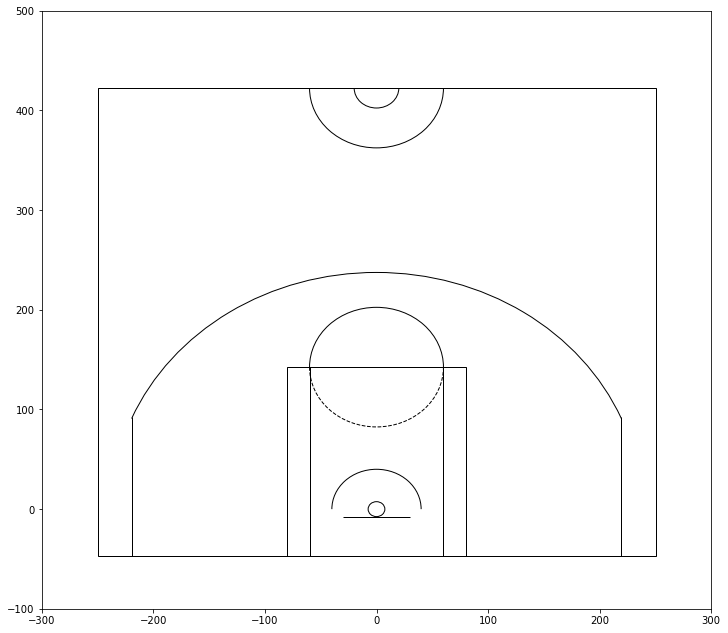

In [61]:
# #draw basketball court
# def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
#     from matplotlib.patches import Circle, Rectangle, Arc
#     from matplotlib.pyplot import gca
    
#     # If an axes object isn't provided to plot onto, just get current one
#     if ax is None:
#         ax = gca()

#     # Create the various parts of an NBA basketball court

#     # Create the basketball hoop
#     # Diameter of a hoop is 18" so it has a radius of 9", which is a value
#     # 7.5 in our coordinate system
#     hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

#     # Create backboard
#     backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

#     # The paint
#     # Create the outer box 0f the paint, width=16ft, height=19ft
#     outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
#                           fill=False)
#     # Create the inner box of the paint, widt=12ft, height=19ft
#     inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
#                           fill=False)

#     # Create free throw top arc
#     top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
#                          linewidth=lw, color=color, fill=False)
#     # Create free throw bottom arc
#     bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
#                             linewidth=lw, color=color, linestyle='dashed')
#     # Restricted Zone, it is an arc with 4ft radius from center of the hoop
#     restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
#                      color=color)

#     # Three point line
#     # Create the side 3pt lines, they are 14ft long before they begin to arc
#     corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
#                                color=color)
#     corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
#     # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
#     # I just played around with the theta values until they lined up with the 
#     # threes
#     three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
#                     color=color)

#     # Center Court
#     center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
#                            linewidth=lw, color=color)
#     center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
#                            linewidth=lw, color=color)

#     # List of the court elements to be plotted onto the axes
#     court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
#                       bottom_free_throw, restricted, corner_three_a,
#                       corner_three_b, three_arc, center_outer_arc,
#                       center_inner_arc]

#     if outer_lines:
#         # Draw the half court line, baseline and side out bound lines
#         outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
#                                 color=color, fill=False)
#         court_elements.append(outer_lines)

#     # Add the court elements onto the axes
#     for element in court_elements:
#         ax.add_patch(element)

#     return ax

# plt.figure(figsize=(12,11))
# draw_court(outer_lines=True)
# plt.xlim(-300,300)
# plt.ylim(-100,500)
# plt.show()

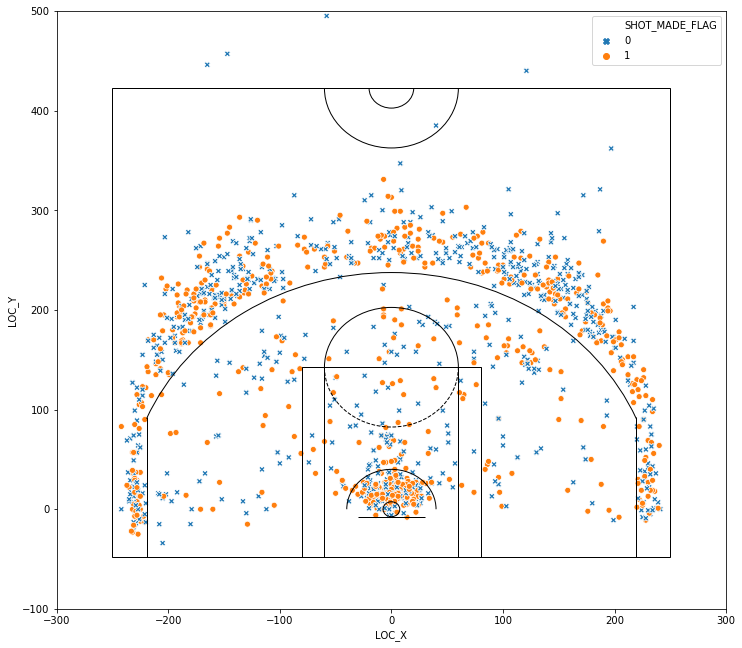

In [62]:
# #visualize shots
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 11))
# markers = {0 : "X", 1 : "o"}
# ax = sns.scatterplot(data=curry_data, x = 'LOC_X', y = 'LOC_Y', style = "SHOT_MADE_FLAG", hue = "SHOT_MADE_FLAG", markers = markers )
# draw_court(outer_lines=True)
# plt.xlim(-300,300)
# plt.ylim(-100,500)
# plt.show()